In [228]:
#pip install numpy


In [229]:
#pip install pandas


In [230]:
#pip install seaborn


In [231]:
#pip install scikit-learn

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
data=pd.read_csv("Loan.csv")
data.sample(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1934,1935,2,Graduate,Yes,5000000.0,15900000.0,16,699,8800000.0,5900000.0,18100000.0,7200000.0,Approved
2566,2567,4,Not Graduate,Yes,2200000.0,8600000.0,2,461,1400000.0,3000000.0,4700000.0,2100000.0,Approved
2930,2931,3,Not Graduate,No,8700000.0,24800000.0,20,360,25300000.0,8700000.0,31100000.0,4300000.0,Rejected
3936,3937,5,Graduate,No,1200000.0,2400000.0,14,495,1800000.0,1800000.0,4100000.0,1300000.0,Rejected
2763,2764,3,Not Graduate,Yes,4600000.0,13600000.0,20,729,1300000.0,8900000.0,17200000.0,5900000.0,Approved
2594,2595,4,Graduate,Yes,4600000.0,11900000.0,6,810,11200000.0,8200000.0,17500000.0,5200000.0,Approved
2282,2283,0,Graduate,Yes,7500000.0,16600000.0,14,440,17200000.0,14500000.0,24100000.0,10300000.0,Rejected
2794,2795,3,Graduate,Yes,5800000.0,17600000.0,6,720,4900000.0,4200000.0,18800000.0,6600000.0,Approved
2548,2549,2,Graduate,Yes,1800000.0,5500000.0,6,448,2900000.0,300000.0,5600000.0,1300000.0,Rejected
2518,2519,1,Not Graduate,Yes,5700000.0,20100000.0,14,442,11700000.0,7300000.0,17900000.0,6500000.0,Rejected


In [283]:
data=data.rename(
    columns={
        'loan_id':'loan_application_id',
        ' no_of_dependents':'financially_dependent_count',
        ' education':'highest_education',
        ' self_employed':'employment_status',
        ' income_annum':'annual_income',
        ' loan_amount':'loan_principal',
        ' loan_term':'loan_duration_months',
        ' cibil_score':'credit_score',
        ' residential_assets_value':'primary_residence_value',
        ' commercial_assets_value':'commercial_property_value',
        ' luxury_assets_value':'high_value_assets',
        ' bank_asset_value':'liquid_assets',
        ' loan_status':'loan_approval_decision'
    }
)
print(data.columns)

Index(['loan_application_id', 'financially_dependent_count',
       'highest_education', 'employment_status', 'annual_income',
       'loan_principal', 'loan_duration_months', 'credit_score',
       'primary_residence_value', 'commercial_property_value',
       'high_value_assets', 'liquid_assets', 'loan_approval_decision'],
      dtype='object')


In [284]:
r,c=data.shape
print(f'Number of Rows is {r} \nNumber of Columns is {c}')


Number of Rows is 4272 
Number of Columns is 13


In [285]:
info_col=data.info()
print(info_col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_application_id          4272 non-null   int64  
 1   financially_dependent_count  4272 non-null   int64  
 2   highest_education            4270 non-null   object 
 3   employment_status            4272 non-null   object 
 4   annual_income                4270 non-null   float64
 5   loan_principal               4271 non-null   float64
 6   loan_duration_months         4272 non-null   int64  
 7   credit_score                 4272 non-null   int64  
 8   primary_residence_value      4270 non-null   float64
 9   commercial_property_value    4270 non-null   float64
 10  high_value_assets            4271 non-null   float64
 11  liquid_assets                4271 non-null   float64
 12  loan_approval_decision       4272 non-null   object 
dtypes: float64(6), int

In [286]:
print(data.isnull().sum())

loan_application_id            0
financially_dependent_count    0
highest_education              2
employment_status              0
annual_income                  2
loan_principal                 1
loan_duration_months           0
credit_score                   0
primary_residence_value        2
commercial_property_value      2
high_value_assets              1
liquid_assets                  1
loan_approval_decision         0
dtype: int64


In [287]:
data['annual_income']=data['annual_income'].fillna(data['annual_income'].median())
data['highest_education']=data['highest_education'].fillna(data['highest_education'].mode()[0])
data['loan_principal']=data['loan_principal'].fillna(data['loan_principal'].median())
data['primary_residence_value']=data['primary_residence_value'].fillna(data['primary_residence_value'].mean())
data['commercial_property_value']=data['commercial_property_value'].fillna(data['commercial_property_value'].mean())
data['high_value_assets']=data['high_value_assets'].fillna(data['high_value_assets'].median())
data['liquid_assets']=data['liquid_assets'].fillna(data['liquid_assets'].median())

In [288]:
duplicate = data[data.duplicated(subset=data.columns[1:])]
duplicate

,loan_application_id,financially_dependent_count,highest_education,employment_status,annual_income,loan_principal,loan_duration_months,credit_score,primary_residence_value,commercial_property_value,high_value_assets,liquid_assets,loan_approval_decision
4269,4270,2,Graduate,No,9600000.0,29900000.0,12,778,2400000.0,17600000.0,22700000.0,8000000.0,Approved
4270,4271,0,Not Graduate,Yes,4100000.0,12200000.0,8,417,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
4271,4272,3,Graduate,No,9100000.0,29700000.0,20,506,7100000.0,4500000.0,33300000.0,12800000.0,Rejected


In [289]:
data.drop_duplicates(inplace=True,subset=data.columns[1:])

In [290]:
data['highest_education']=data['highest_education'].map({' Graduate':1,' Not Graduate':0})
data['loan_approval_decision']=data['loan_approval_decision'].map({' Approved':1,' Rejected':0})
data['employment_status']=data['employment_status'].map({' Yes':1,' No':0})

In [294]:
Q1 = data['commercial_property_value'].quantile(0.25)
Q3 = data['commercial_property_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['commercial_property_value'] < lower_bound) | (data['commercial_property_value'] > upper_bound)]
data['commercial_property_value'] = np.where((data['commercial_property_value'] < lower_bound) | (data['commercial_property_value'] > upper_bound), data['commercial_property_value'].median(), data['commercial_property_value'])

In [243]:
median = data['primary_residence_value'].median()
mad = (np.abs(data['primary_residence_value'] - median)).median()
modified_z_scores = 0.6745 * (data['primary_residence_value'] - median) / mad
outliers = data[modified_z_scores > 3.5]
data['primary_residence_value'] = np.where(modified_z_scores > 3.5, data['primary_residence_value'].median(), data['primary_residence_value'])


In [244]:
Q1 = data['liquid_assets'].quantile(0.25)
Q3 = data['liquid_assets'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['liquid_assets'] < lower_bound) | (data['liquid_assets'] > upper_bound)]
data['liquid_assets'] = np.where((data['liquid_assets'] < lower_bound) | (data['liquid_assets'] > upper_bound), data['liquid_assets'].median(), data['liquid_assets'])

In [245]:
data.sample(10)

,loan_application_id,financially_dependent_count,highest_education,employment_status,annual_income,loan_principal,loan_duration_months,credit_score,primary_residence_value,commercial_property_value,high_value_assets,liquid_assets,loan_approval_decision
329,330,4,0,0,200000.0,600000.0,10,404,0.0,100000.0,400000.0,0.0,0
4012,4013,2,0,0,700000.0,2300000.0,8,663,700000.0,500000.0,2800000.0,1000000.0,1
1618,1619,1,0,1,5300000.0,14100000.0,14,510,13300000.0,10400000.0,18900000.0,7800000.0,0
758,759,3,1,1,9400000.0,24600000.0,10,414,8800000.0,13400000.0,23800000.0,5600000.0,0
1692,1693,3,1,0,300000.0,700000.0,20,735,900000.0,200000.0,900000.0,400000.0,1
1174,1175,4,1,1,9800000.0,27000000.0,2,395,18700000.0,3000000.0,23000000.0,9700000.0,0
2747,2748,1,1,1,9700000.0,25500000.0,18,741,21900000.0,6200000.0,34800000.0,4900000.0,1
584,585,4,1,1,9500000.0,31800000.0,6,519,5900000.0,1300000.0,28400000.0,12200000.0,0
3080,3081,1,0,1,6000000.0,13100000.0,2,368,9900000.0,2200000.0,13700000.0,4900000.0,0
2352,2353,3,1,1,3000000.0,8300000.0,4,685,2900000.0,5400000.0,11300000.0,3800000.0,1


In [246]:
# X=data.drop(columns=['loan_approval_decision','loan_application_id'],axis=1)
# X

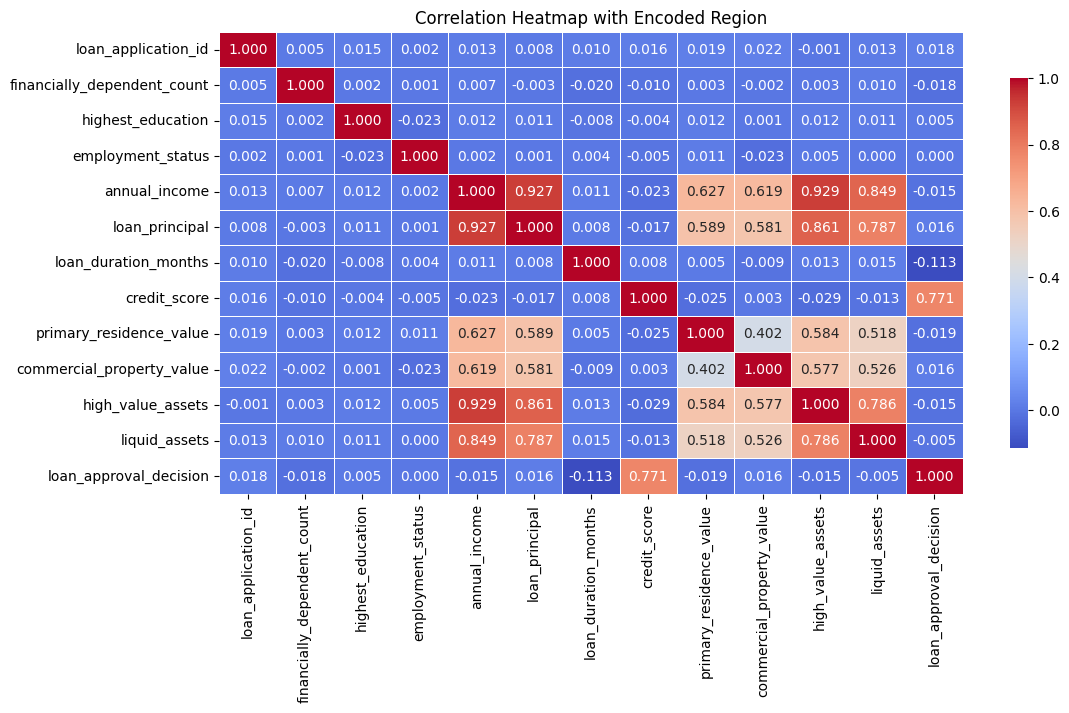

In [247]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f", cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title("Correlation Heatmap with Encoded Region")
plt.show()

In [248]:
X= data[['annual_income','loan_principal','loan_duration_months','credit_score',
       'primary_residence_value', 'commercial_property_value',
       'high_value_assets']]
X

,annual_income,loan_principal,loan_duration_months,credit_score,primary_residence_value,commercial_property_value,high_value_assets
0,9600000.0,29900000.0,12,778,2400000.0,3700000.0,22700000.0
1,4100000.0,12200000.0,8,417,2700000.0,2200000.0,8800000.0
2,9100000.0,29700000.0,20,506,7100000.0,4500000.0,33300000.0
3,8200000.0,30700000.0,8,467,18200000.0,3300000.0,23300000.0
4,9800000.0,24200000.0,20,382,12400000.0,8200000.0,29400000.0
...,...,...,...,...,...,...,...
4264,1000000.0,2300000.0,12,317,2800000.0,500000.0,3300000.0
4265,3300000.0,11300000.0,20,559,4200000.0,2900000.0,11000000.0
4266,6500000.0,23900000.0,18,457,1200000.0,12400000.0,18100000.0
4267,4100000.0,12800000.0,8,780,8200000.0,700000.0,14100000.0


In [249]:
y=data['loan_approval_decision']
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_approval_decision, Length: 4269, dtype: int64

# Divide datasets into training and testing subsets

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,annual_income,loan_principal,loan_duration_months,credit_score,primary_residence_value,commercial_property_value,high_value_assets
921,2100000.0,6100000.0,8,346,5500000.0,600000.0,4500000.0
3119,9800000.0,29400000.0,8,592,5600000.0,16700000.0,35900000.0
3975,6100000.0,22300000.0,8,694,16200000.0,10900000.0,22900000.0
756,4700000.0,18700000.0,20,445,2100000.0,0.0,11100000.0
2763,4600000.0,13600000.0,20,729,1300000.0,8900000.0,17200000.0
...,...,...,...,...,...,...,...
3444,1300000.0,4700000.0,16,530,3200000.0,1000000.0,3800000.0
466,500000.0,1800000.0,18,411,1000000.0,500000.0,1300000.0
3092,8600000.0,20600000.0,16,449,10800000.0,10600000.0,28700000.0
3772,7000000.0,21400000.0,12,541,3700000.0,1300000.0,19800000.0


# Standardize the input data

In [252]:
from sklearn.preprocessing import StandardScaler

In [253]:
ss=StandardScaler().fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)
X_train

array([[-1.05600913, -1.00191622, -0.53217346, ..., -0.29433582,
        -1.00848973, -1.16748001],
       [ 1.67854082,  1.56949614, -0.53217346, ..., -0.27877191,
         2.81846294,  2.25365269],
       [ 0.36453629,  0.78593271, -0.53217346, ...,  1.37100214,
         1.43980918,  0.83726017],
       ...,
       [ 1.25237719,  0.59831894,  0.86577474, ...,  0.53055121,
         1.3684995 ,  1.46918914],
       [ 0.68415902,  0.68660777,  0.16680064, ..., -0.57448613,
        -0.84210048,  0.49950503],
       [ 0.40004993,  0.23412749, -0.88166051, ...,  0.81070152,
        -0.27162307,  1.03337606]], shape=(2860, 7))

In [254]:
X_test

array([[ 0.11594084,  0.49899399,  1.56474884, ..., -0.13869676,
         1.22588015,  0.05279662],
       [ 0.29350902, -0.13006396, -0.53217346, ..., -0.41884707,
         1.10703069,  0.28159849],
       [ 1.60751354,  0.5210662 ,  0.51628769, ..., -0.4966666 ,
         2.69961348,  1.44739848],
       ...,
       [ 0.15145448,  0.58728283,  0.16680064, ..., -1.02583941,
         0.89310166,  0.35786578],
       [ 0.08042721,  0.36656074, -0.88166051, ..., -0.10756895,
         0.89310166,  0.15085456],
       [-0.98498186, -0.9356996 ,  0.86577474, ..., -0.10756895,
        -0.36670264, -0.69898094]], shape=(1409, 7))

In [255]:
accuracyList=[]

In [256]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# LogisticRegression

In [257]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Logistic Regression',accuracy])
accuracyList           

Predicted outcomes: [0 1 0 ... 1 1 1]
Accuracy: 0.9034776437189496

Confusion Matrix:
 [[454  68]
 [ 68 819]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       522
           1       0.92      0.92      0.92       887

    accuracy                           0.90      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.90      0.90      0.90      1409



[['Logistic Regression', 0.9034776437189496]]

# KNeighborsClassifier

In [258]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['KNeighbors Classifier',accuracy])
accuracyList  

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9183818310858765

Confusion Matrix:
 [[482  40]
 [ 75 812]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       522
           1       0.95      0.92      0.93       887

    accuracy                           0.92      1409
   macro avg       0.91      0.92      0.91      1409
weighted avg       0.92      0.92      0.92      1409



[['Logistic Regression', 0.9034776437189496],
 ['KNeighbors Classifier', 0.9183818310858765]]

# DecisionTreeClassifier

In [259]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Decision Tree Classifier',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9779985805535841

Confusion Matrix:
 [[501  21]
 [ 10 877]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       522
           1       0.98      0.99      0.98       887

    accuracy                           0.98      1409
   macro avg       0.98      0.97      0.98      1409
weighted avg       0.98      0.98      0.98      1409



[['Logistic Regression', 0.9034776437189496],
 ['KNeighbors Classifier', 0.9183818310858765],
 ['Decision Tree Classifier', 0.9779985805535841]]

# Decision Tree Classifier With Tuning

In [260]:
from sklearn.model_selection import GridSearchCV
 
param={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,None],
    'max_features':['auto','sqrt','log2']
}
grid=GridSearchCV(model,param_grid=param,cv=5,scoring='accuracy')
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [261]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'splitter': 'best'}

In [262]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Decision Tree Classifier With Tuning',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9701916252661462

Confusion Matrix:
 [[499  23]
 [ 19 868]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       522
           1       0.97      0.98      0.98       887

    accuracy                           0.97      1409
   macro avg       0.97      0.97      0.97      1409
weighted avg       0.97      0.97      0.97      1409



[['Logistic Regression', 0.9034776437189496],
 ['KNeighbors Classifier', 0.9183818310858765],
 ['Decision Tree Classifier', 0.9779985805535841],
 ['Decision Tree Classifier With Tuning', 0.9701916252661462]]

# Support Vector Classifier

In [263]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Support Vector Classifier',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9418026969481902

Confusion Matrix:
 [[487  35]
 [ 47 840]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       522
           1       0.96      0.95      0.95       887

    accuracy                           0.94      1409
   macro avg       0.94      0.94      0.94      1409
weighted avg       0.94      0.94      0.94      1409



[['Logistic Regression', 0.9034776437189496],
 ['KNeighbors Classifier', 0.9183818310858765],
 ['Decision Tree Classifier', 0.9779985805535841],
 ['Decision Tree Classifier With Tuning', 0.9701916252661462],
 ['Support Vector Classifier', 0.9418026969481902]]

# kernels SVC 

In [264]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    print(f"\nUsing {kernel} kernel:")
    svc = SVC(kernel=kernel) 
    svc.fit(X_train, y_train)
    # Predict and evaluate
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


Using linear kernel:
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       522
           1       0.94      0.92      0.93       887

    accuracy                           0.91      1409
   macro avg       0.90      0.91      0.91      1409
weighted avg       0.91      0.91      0.91      1409


Using poly kernel:
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.84       522
           1       0.88      0.94      0.91       887

    accuracy                           0.88      1409
   macro avg       0.88      0.87      0.87      1409
weighted avg       0.88      0.88      0.88      1409


Using rbf kernel:
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       522
           1       0.96      0.95      0.95       887

    

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       522
           1       0.92      0.91      0.92       887

    accuracy                           0.90      1409
   macro avg       0.89      0.89      0.89      1409
weighted avg       0.90      0.90      0.90      1409


Using rbf kernel:
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       522
           1       0.96      0.94      0.95       887

    accuracy                           0.93      1409
   macro avg       0.93      0.93      0.93      1409
weighted avg       0.93      0.93      0.93      1409


Using sigmoid kernel:
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76       522
           1       0.87      0.83      0.85       887

    accuracy                          

# SVC With Tuning


In [265]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
             }
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.930 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.935 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.937 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.923 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.906 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.893 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.923 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.934 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [266]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [267]:
predictions=grid.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['SVC With Tuning',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9524485450674237

Confusion Matrix:
 [[488  34]
 [ 33 854]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       522
           1       0.96      0.96      0.96       887

    accuracy                           0.95      1409
   macro avg       0.95      0.95      0.95      1409
weighted avg       0.95      0.95      0.95      1409



[['Logistic Regression', 0.9034776437189496],
 ['KNeighbors Classifier', 0.9183818310858765],
 ['Decision Tree Classifier', 0.9779985805535841],
 ['Decision Tree Classifier With Tuning', 0.9701916252661462],
 ['Support Vector Classifier', 0.9418026969481902],
 ['SVC With Tuning', 0.9524485450674237]]

# GaussianNB

In [268]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Naive Bayes',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9339957416607523

Confusion Matrix:
 [[489  33]
 [ 60 827]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       522
           1       0.96      0.93      0.95       887

    accuracy                           0.93      1409
   macro avg       0.93      0.93      0.93      1409
weighted avg       0.94      0.93      0.93      1409



[['Logistic Regression', 0.9034776437189496],
 ['KNeighbors Classifier', 0.9183818310858765],
 ['Decision Tree Classifier', 0.9779985805535841],
 ['Decision Tree Classifier With Tuning', 0.9701916252661462],
 ['Support Vector Classifier', 0.9418026969481902],
 ['SVC With Tuning', 0.9524485450674237],
 ['Naive Bayes', 0.9339957416607523]]

# RandomForestClassifier

In [269]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Random Forest Classifier',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9765791341376863

Confusion Matrix:
 [[499  23]
 [ 10 877]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       522
           1       0.97      0.99      0.98       887

    accuracy                           0.98      1409
   macro avg       0.98      0.97      0.97      1409
weighted avg       0.98      0.98      0.98      1409



[['Logistic Regression', 0.9034776437189496],
 ['KNeighbors Classifier', 0.9183818310858765],
 ['Decision Tree Classifier', 0.9779985805535841],
 ['Decision Tree Classifier With Tuning', 0.9701916252661462],
 ['Support Vector Classifier', 0.9418026969481902],
 ['SVC With Tuning', 0.9524485450674237],
 ['Naive Bayes', 0.9339957416607523],
 ['Random Forest Classifier', 0.9765791341376863]]

# AdaBoostClassifier

In [270]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

weak_learner = DecisionTreeClassifier(max_depth=1)

model = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Ada Boost Classifier',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9673527324343506

Confusion Matrix:
 [[496  26]
 [ 20 867]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       522
           1       0.97      0.98      0.97       887

    accuracy                           0.97      1409
   macro avg       0.97      0.96      0.96      1409
weighted avg       0.97      0.97      0.97      1409



[['Logistic Regression', 0.9034776437189496],
 ['KNeighbors Classifier', 0.9183818310858765],
 ['Decision Tree Classifier', 0.9779985805535841],
 ['Decision Tree Classifier With Tuning', 0.9701916252661462],
 ['Support Vector Classifier', 0.9418026969481902],
 ['SVC With Tuning', 0.9524485450674237],
 ['Naive Bayes', 0.9339957416607523],
 ['Random Forest Classifier', 0.9765791341376863],
 ['Ada Boost Classifier', 0.9673527324343506]]

# GradientBoostingClassifier

In [271]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print("Predicted outcomes:", predictions)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predictions))
accuracyList.append(['Gradient Boosting Classifier',accuracy])
accuracyList 

Predicted outcomes: [0 1 0 ... 1 0 1]
Accuracy: 0.9758694109297374

Confusion Matrix:
 [[500  22]
 [ 12 875]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       522
           1       0.98      0.99      0.98       887

    accuracy                           0.98      1409
   macro avg       0.98      0.97      0.97      1409
weighted avg       0.98      0.98      0.98      1409



[['Logistic Regression', 0.9034776437189496],
 ['KNeighbors Classifier', 0.9183818310858765],
 ['Decision Tree Classifier', 0.9779985805535841],
 ['Decision Tree Classifier With Tuning', 0.9701916252661462],
 ['Support Vector Classifier', 0.9418026969481902],
 ['SVC With Tuning', 0.9524485450674237],
 ['Naive Bayes', 0.9339957416607523],
 ['Random Forest Classifier', 0.9765791341376863],
 ['Ada Boost Classifier', 0.9673527324343506],
 ['Gradient Boosting Classifier', 0.9758694109297374]]

# Accuracy Table

In [272]:
df=pd.DataFrame(accuracyList,columns=['Model Name','Accuracy'])
df=df.sort_values(by='Accuracy')
df

,Model Name,Accuracy
0,Logistic Regression,0.903478
1,KNeighbors Classifier,0.918382
6,Naive Bayes,0.933996
4,Support Vector Classifier,0.941803
5,SVC With Tuning,0.952449
8,Ada Boost Classifier,0.967353
3,Decision Tree Classifier With Tuning,0.970192
9,Gradient Boosting Classifier,0.975869
7,Random Forest Classifier,0.976579
2,Decision Tree Classifier,0.977999


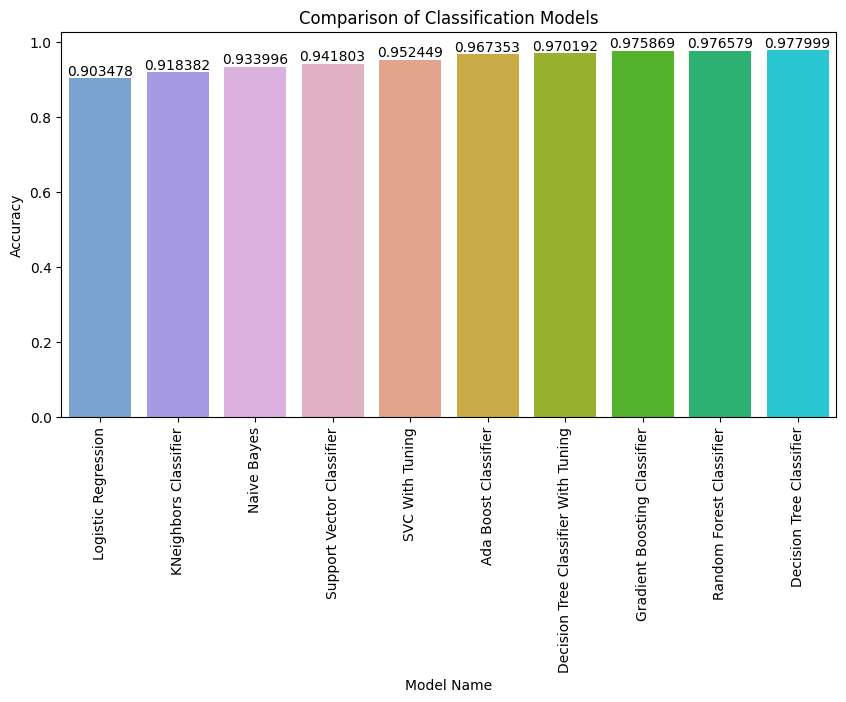

In [273]:
p=["#6aa2de","#9d8df2","#e1a9e8","#e8a9c0","#f29d7e","#deb531","#a6c716","#4bc716","#16c774","#0edeed"]
plt.figure(figsize=(10,5))
plt.title("Comparison of Classification Models")
ax=sns.barplot(x=df['Model Name'],y=df['Accuracy'],palette =p)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, fontsize=10);


### **Classification Model Performance**  

   - Decision Tree, Gradient Boosting, and Random Forest had the highest accuracy.  
   - Tuned SVC improved accuracy, while tuned Decision Tree slightly declined.  
   - Boosting Models (AdaBoost & Gradient Boosting) Strong performance, robust against overfitting, and effective for structured data.  
   - Default SVC performed well, and tuning further improved accuracy.  
   - Logistic Regression and Naïve Bayes Performed reasonably but were outperformed by tree-based and boosting models.  
   - K-Nearest Neighbors Lowest accuracy due to sensitivity to noise and dataset complexity.

 
   - Tree-based models (Decision Tree, Random Forest, Gradient Boosting) performed best.  
   - Boosting methods (AdaBoost, Gradient Boosting) offer a good balance between performance and generalization.  

### Final Recommendation
   - Decision Tree, Gradient Boosting, and Random Forest are the top choices.  
   - Logistic Regression is an alternative for interpretability.  
   - Boosting methods enhance performance with structured data.